In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("Zoo.csv")

In [5]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
data.shape

(101, 18)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [9]:
data.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [10]:
data = data.rename({'animal name':'name'},axis=1)

In [11]:
data.head()

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [13]:
data['encoded_name'] = LabelEncoder().fit_transform(data['name'])

In [14]:
data.head()

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,encoded_name
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,0
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,2
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,3
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,4


In [15]:
x = data.drop(columns=['name','type'])
y = data['type']

In [16]:
x.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,encoded_name
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,0
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,2
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,3
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,4


In [17]:
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [18]:
# applying grid search to find best parameters

In [19]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [20]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [21]:
print(grid.best_score_)
print(grid.best_params_)

0.4057142857142857
{'n_neighbors': 19}


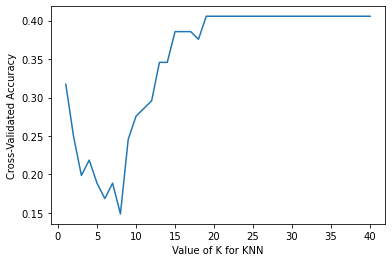

In [23]:
k_range = range(1, 41)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [24]:
# here we can see that at k=19 the accuracy is highest

In [25]:
# final model building

In [26]:
num_folds = 2
kfold = KFold(n_splits=num_folds)

In [27]:
model_final =  KNeighborsClassifier(n_neighbors=19)
results = cross_val_score(model, x, y, cv=kfold)
results

array([0.47058824, 0.34      ])

In [28]:
results.mean()

0.4052941176470588

In [29]:
model.fit(x,y)

KNeighborsClassifier()

In [32]:
Y_predicted = model.predict(x)
data['Y_predicted'] = pd.Series(Y_predicted)

In [34]:
confusion_matrix(y,data['Y_predicted'])

array([[37,  4,  0,  0,  0,  0,  0],
       [ 9, 11,  0,  0,  0,  0,  0],
       [ 2,  1,  1,  1,  0,  0,  0],
       [ 3,  6,  1,  3,  0,  0,  0],
       [ 3,  0,  1,  0,  0,  0,  0],
       [ 4,  0,  1,  0,  0,  3,  0],
       [ 5,  4,  0,  0,  0,  0,  1]], dtype=int64)

In [35]:
data['Y_predicted'].unique()

array([1, 4, 2, 7, 6, 3], dtype=int64)

In [36]:
y.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)